In [1]:
from __future__ import print_function

from pylab import *
%matplotlib inline

import scipy

from ipywidgets import interact, interactive, fixed, interact_manual

import skimage #scikit-image biblioteka

from skimage import *
from skimage import io
from skimage.color import *
from skimage.exposure import *
from skimage.filters import *

import numpy as np

#plt.style.use('dark_background')

## Učitavanje slike

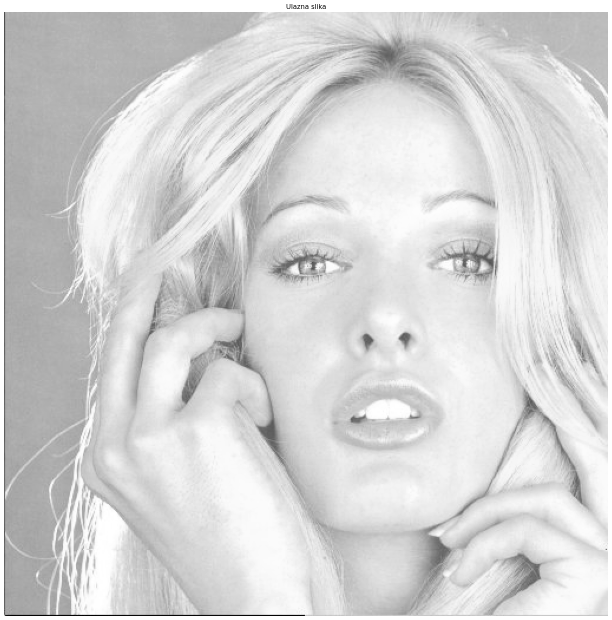

In [2]:
f = io.imread('tiffany_gray.tiff', plugin="tifffile")

figure(figsize=(20,20), dpi=40), imshow(f, cmap='gray', vmin=0, vmax=255)
axis('off')
title('Ulazna slika')
show()

## Histogram slike

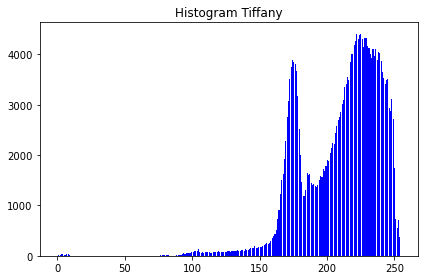

In [8]:
hist_f, bin_edges = np.histogram(f.flatten(), bins=256, range=[0,255])
plt.bar(bin_edges[0:-1], hist_f, color='b')

plt.title('Histogram Tiffany')
plt.tight_layout()
plt.show()

# Skaliranje kontrasta - razvlačenje kontrasta

## Odsecanje - funkcija rescale intensity

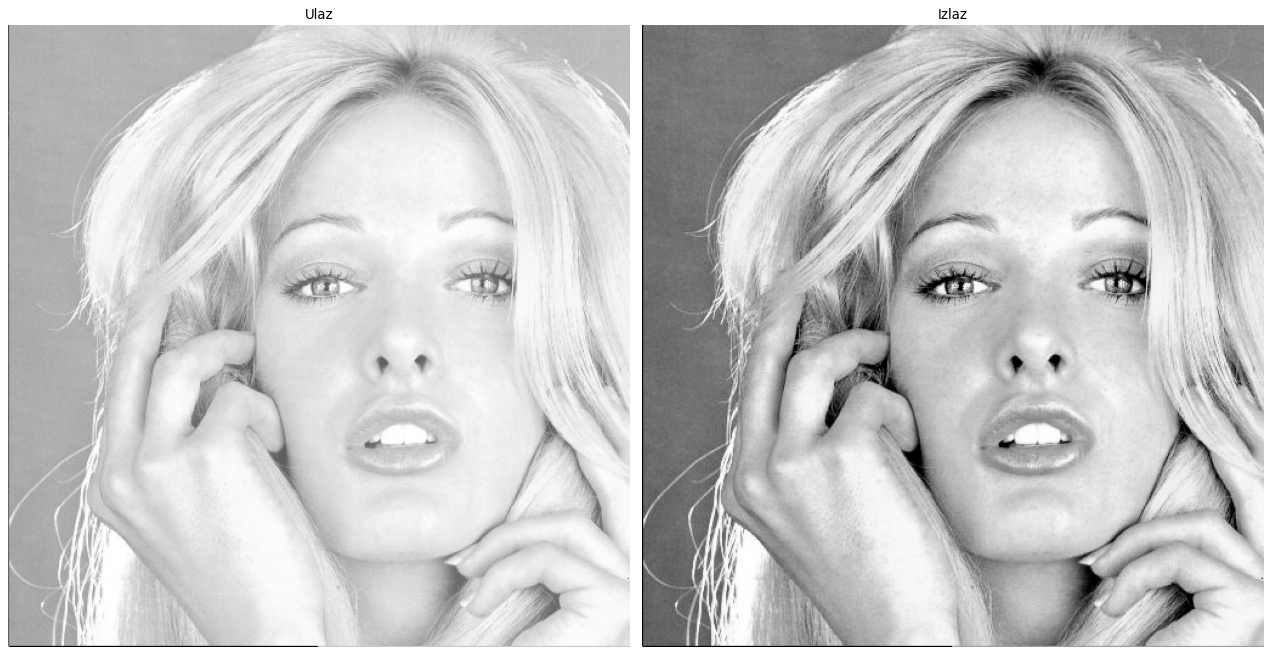

In [9]:
g = rescale_intensity(f, in_range=(110,255), out_range=(0,255))

fig, axes = plt.subplots(ncols=2, figsize=(16,11), dpi=80)
# otpakujemo ose kako bismo dodelili svaki od zasebnih plotova
ax = axes.ravel()

ax[0].imshow(f, cmap='gray')
ax[0].set_title('Ulaz')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray')
ax[1].set_title('Izlaz')
ax[1].axis('off')

fig.tight_layout()
plt.show()

### Histogram pre i posle

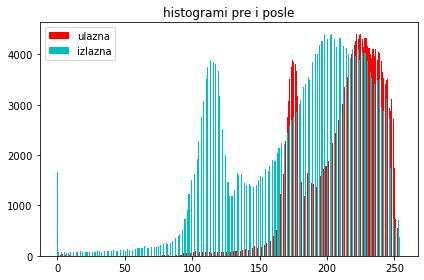

In [10]:
hist_f, bin_edges = np.histogram(f.flatten(), bins=256, range=[0,255])
hist_g, bin_edges = np.histogram(g.flatten(), bins=256, range=[0,255])

# kod plotovanja histograma iako ima bin_edges 0-255, zapravo treba da ima 255 barova pa je onda [0:-1]
plt.bar(bin_edges[0:-1], hist_f, color='r')
plt.bar(bin_edges[0:-1], hist_g, color='c')

plt.title('histogrami pre i posle')
plt.tight_layout()
plt.legend(['ulazna', 'izlazna'])
plt.show()

## Funkcija za razvlacenje histograma

In [11]:
def razvlacenje_histograma(f, in_min=0, in_max=255):
    g = rescale_intensity(f, in_range=(in_min, in_max), out_range=(0,255))
    
    hist, bin_edges = np.histogram(g.flatten(), bins=256, range=(0,255))
    
    fig, ax = plt.subplots(ncols=2, figsize=(24,8), dpi=80)
    fig.tight_layout()
    
    ax[0].imshow(g, cmap='gray', vmin=0, vmax=255); ax[0].set_title('Izlazna slika'); ax[0].axis('off')
    ax[1].bar(bin_edges[0:-1], hist); ax[1].set_title('Histogram izlazne slike')
    
    return

In [12]:
interact(razvlacenje_histograma, f=fixed(f), in_min=(0,255), in_max=(0,255))

interactive(children=(IntSlider(value=0, description='in_min', max=255), IntSlider(value=255, description='in_…

<function __main__.razvlacenje_histograma(f, in_min=0, in_max=255)>

### Razvlacenje kontrasta do minimuma i maksimuma opsega

In [ ]:
# TODO pronaći minimum i maksimum vrednosti slike i njih iskoristiti za razvlacenje na pun opseg
low_in = min(f.flatten())
high_in = max(f.flatten())
print(low_in, high_in)

g_min_max = rescale_intensity(f, in_range=(low_in, high_in), out_range=(0,255))

fig, ax = plt.subplots(ncols=2, figsize=(16, 10), dpi=40)
fig.tight_layout()

ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Ulazna slika')
ax[0].axis('off')

ax[1].imshow(g_min_max, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Izlazna slika')
ax[1].axis('off')

### Razvlacenje kontrasta do nekog procenta najsvetlijih i najtamnijih piksela

123 255


(-0.5, 511.5, 511.5, -0.5)

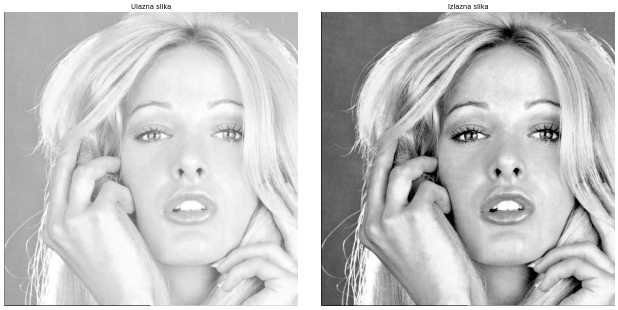

In [13]:
# TODO razvlačenje kontrasta do nekog procenta najmanjih i najvecih piksela
low_perc = 1
high_perc = 100
# koja je vrednost od koje je samo 1% piksela manje tj tamnije
low_in = uint8(np.percentile(f.flatten(), low_perc))
# koja je vrednost od koje je 99% piksela manje tj svetlije - pandan 1% svetlijih
high_in = uint8(np.percentile(f.flatten(), high_perc))
print(low_in, high_in)

g_min_max = rescale_intensity(f, in_range=(low_in, high_in), out_range=(0,255))

fig, ax = plt.subplots(ncols=2, figsize=(16, 10), dpi=40)
fig.tight_layout()

ax[0].imshow(f, cmap='gray', vmin=0, vmax=255); ax[0].set_title('Ulazna slika'); ax[0].axis('off')
ax[1].imshow(g_min_max, cmap='gray', vmin=0, vmax=255); ax[1].set_title('Izlazna slika'); ax[1].axis('off')

## poredjenje sa pragom

In [16]:
# TODO napisati funkciju koja vrsi binarizaciju slike prema zadatom pragu i iscrtava origanlnu sliku i binarozovanu sliku jednu pored druge
def image_binarization(f, t=0.5):
    # jedinice svuda gde je vrednost slike veca od praga t, nule gde je manja
    g = f>t
    
    
    fig, ax = plt.subplots(ncols=2, figsize=(24, 8), dpi=80)
    fig.tight_layout()

    ax[0].imshow(f, cmap='gray', vmin=0, vmax=1)
    ax[0].set_title('Ulazna slika')
    ax[0].axis('off')
    
    ax[1].imshow(g, cmap='gray', vmin=0, vmax=1)
    ax[1].set_title('Binarizovana slika')
    ax[1].axis('off')
    plt.show()
    
    return

In [17]:
f = rgb2gray(imread('text.jpg'))

interactive(image_binarization, f=fixed(f), t = (0,1, 0.01))

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

## Izdvajanje regiona određene sjajnosti

(-0.5, 719.5, 827.5, -0.5)

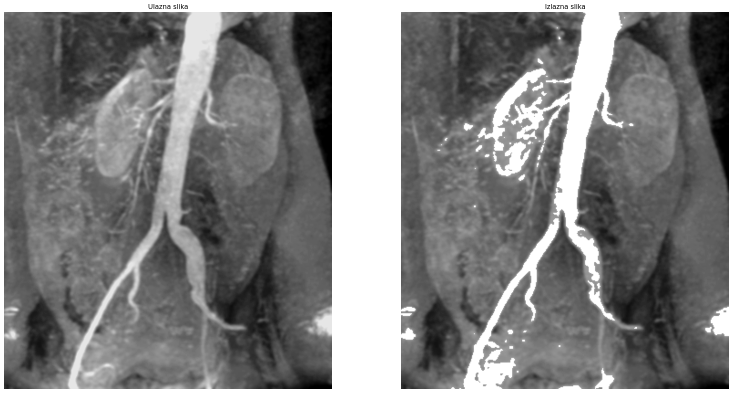

In [38]:
# TODO postaviti vrednost piksela koje pripadaju nekom zadatom opsegu na mksimum, odnosno 255
image = io.imread('kidney.tif', plugin="tifffile")

low_in = 155
high_in = 235

g_region = np.copy(image)
g_region[(g_region>low_in) & (g_region<high_in)] = 255

fig, ax = plt.subplots(ncols=2, figsize=(32, 16), dpi=40)
fig.tight_layout()

ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Ulazna slika')
ax[0].axis('off')

ax[1].imshow(g_region, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Izlazna slika')
ax[1].axis('off')

## Logaritamska i stepena transformacija slike

### Logaritamska

In [40]:
import imageio
from imageio.plugins import freeimage
# ako ne radi treba pokrenuti sledeci download
#imageio.plugins.freeimage.download()

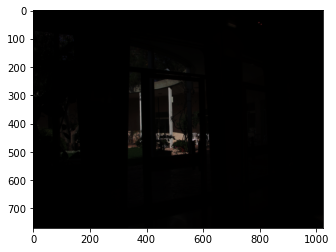

In [41]:
f = imageio.imread('../belgium.hdr', format='HDR-FI')
f = f/max(f.flatten())

imshow(f)

In [44]:
def log_transform(img, c):
    g = log(1 + (10**c)*f)/log(1+10**c)
    plt.figure(figsize=(32,20))
    axis('off')
    imshow(g)

In [45]:
interact(log_transform, img=fixed(f), c=(0,10,0.2))

interactive(children=(FloatSlider(value=5.0, description='c', max=10.0, step=0.2), Output()), _dom_classes=('w…

<function __main__.log_transform(img, c)>

### Stepena

In [46]:
# TODO napisati funkciju koja realizuje stepenu kompresiju kontrasta slike

def exp_transform(img, c, k):
    g = c*img**k
    g[g>1] = 1
    g[g<0] = 0
    plt.figure(figsize=(32,20))
    axis('off')
    imshow(g)

In [48]:
interact(exp_transform, img=fixed(f), c=(0,5,0.1), k=(0,1,0.05))

interactive(children=(FloatSlider(value=2.0, description='c', max=5.0), FloatSlider(value=0.0, description='k'…

<function __main__.exp_transform(img, c, k)>

### Funkcija za iscrtavanje slike i histograma

In [56]:
def plot_img_and_hist(image, axes, bins=256):
    # ne znamo koji je format slike pa skaliramo za svaki slucaj
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()
    
    # iscrtavanje
    ax_img.imshow(image, cmap='gray', vmin=0, vmax=1), ax_img.set_axis_off()
    
    # iscrtavanje histograma
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='blue')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax_hist.set_xlabel('Intenzitet piksela')
    ax_hist.set_xlim(0,1)
    ax_hist.set_yticks([])
    
    # iscrtavanje kumulativnog histograma
    img_cdf, bins = cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])
    
    return ax_img, ax_hist, ax_cdf

# Ekvalizacija histograma

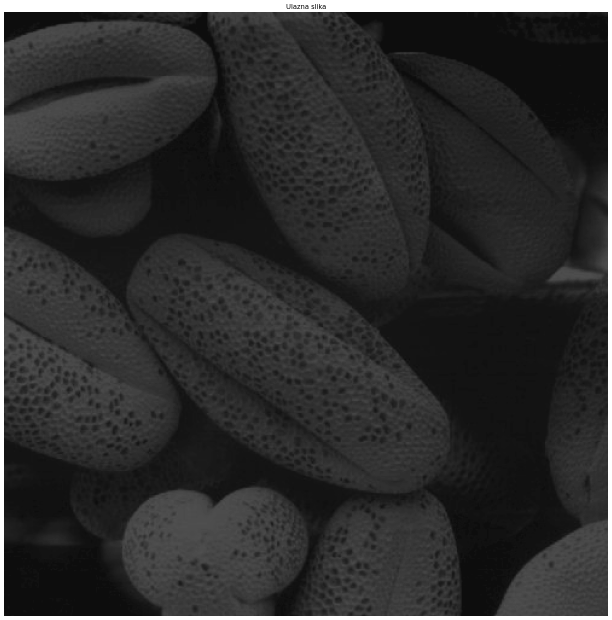

In [57]:
# ucitavanje ulazne slike
img=io.imread('dark.tif')
figure(figsize=(20,20), dpi=40), imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Ulazna slika')
plt.axis('off')
plt.show()

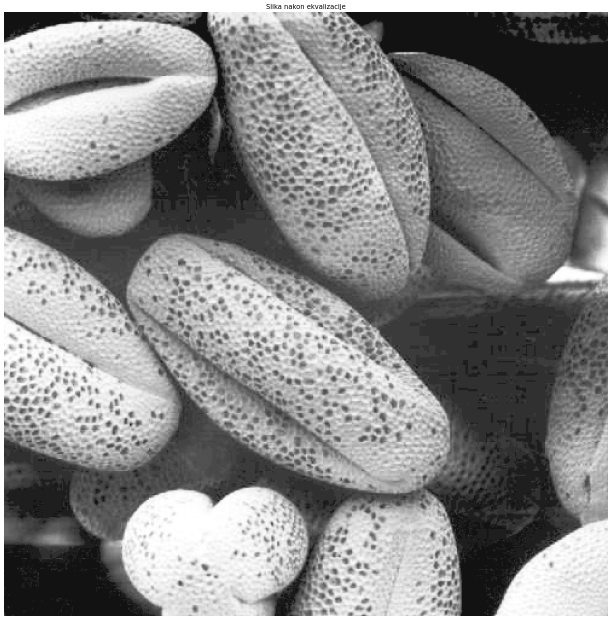

In [58]:
#Ekvalizacija histograma
img_eq =equalize_hist(img)
figure(figsize=(20,20), dpi=40), imshow(img_eq, cmap='gray', vmin=0, vmax=1)
plt.title('Slika nakon ekvalizacije')
plt.axis('off')
plt.show()

# Poređenje metoda

C:\Users\mejas\AppData\Local\Temp/ipykernel_10860/2472176430.py:15: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2,4), dtype=np.object)


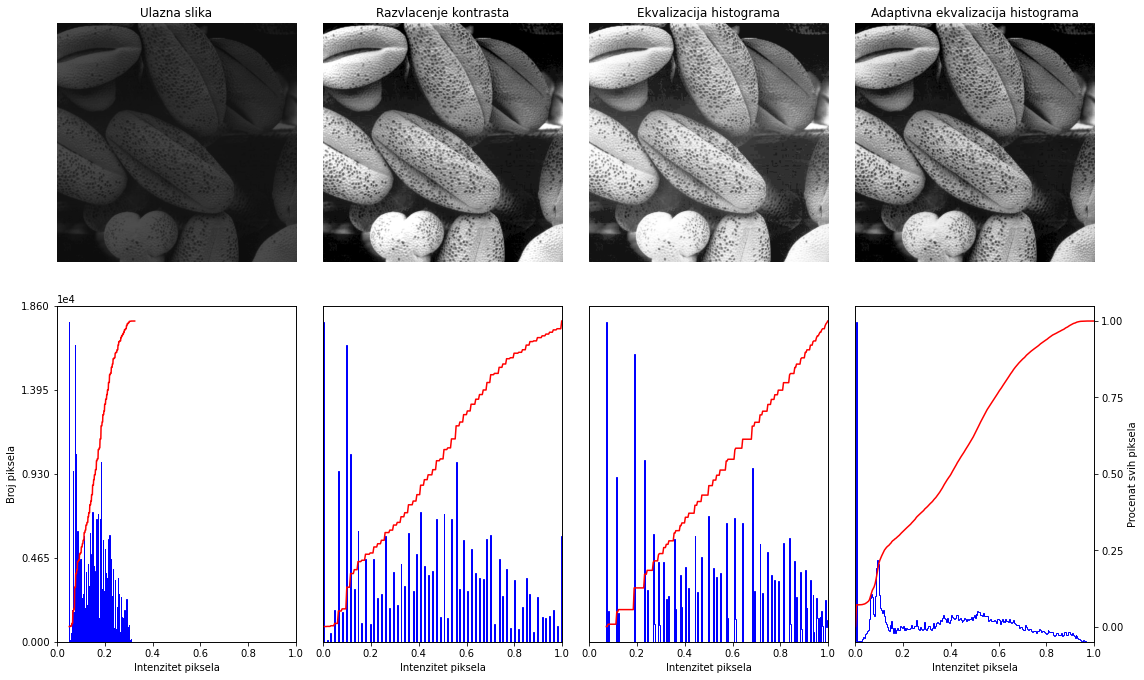

In [59]:
# ucitavanje ulazne slike
img=io.imread('dark.tif')

# Razvlacenje konstrasta
p2, p98 = np.percentile(img, (2,98))

#Ekvalizacija histograma
img_eq = equalize_hist(img)

#Ekvalizacija histograma sa ogranicenjem kontrasta
img_eaq = equalize_adapthist(img)

# prikaz rezultata
fig= plt.figure(figsize=(16,10))
axes = np.zeros((2,4), dtype=np.object)
axes[0,0] = fig.add_subplot(2,4,1)
for i in range(1,4):
    axes[0,i] = fig.add_subplot(2,4,1+i, sharex=axes[0,0])
for i in range(0,4):
    axes[1,i] = fig.add_subplot(2,4,5+i)
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:,0])
ax_img.set_title('Ulazna slika')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Broj piksela')
ax_hist.set_yticks(np.linspace(0,y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescaled, axes[:,1])
ax_img.set_title('Razvlacenje kontrasta')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:,2])
ax_img.set_title('Ekvalizacija histograma')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eaq, axes[:,3])
ax_img.set_title('Adaptivna ekvalizacija histograma')

ax_cdf.set_ylabel('Procenat svih piksela')
ax_cdf.set_yticks(np.linspace(0,1,5))

# sprecava preklapanje oznaka na y osi
fig.tight_layout()
plt.show()

# Specifikacija histograma

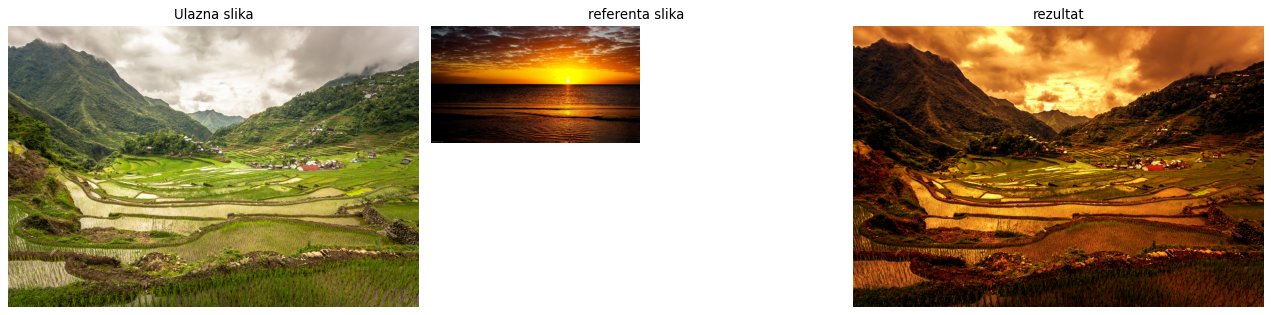

In [60]:
ref= imread('sunset.jpg') # slika sa koje uzimamo histogram
img = imread('landscape.jpg') # slika koju menjamo

img_histmatch = match_histograms(img, ref, multichannel=True)

fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6), dpi=80, sharex=True, sharey=True)

for i in range(0,3):
    ax[i].set_axis_off()
    
ax[0].imshow(img), ax[0].set_title('Ulazna slika')
ax[1].imshow(ref), ax[1].set_title('referenta slika')
ax[2].imshow(img_histmatch), ax[2].set_title('rezultat')
plt.tight_layout()
plt.show()

Prikaz histograma i kumulativnih histograma

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12))

for i, image in enumerate((img, ref, img_histmatch)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = histogram(image[..., c], source_range='dtype')
        axes[c,i].bar(bins, img_hist/img_hist.max(), color='yellow')
        img_cdf, bins = cumulative_distribution(image[..., c])
        axes[c,i].plot(bins, img_cdf, 'r')
        axes[c,0].set_ylabel(c_color)
        
axes[0,0].set_title('Ulazna slika')
axes[0,1].set_title('Referentna slika')
axes[0,2].set_title('Izlaz nakon specifikacije histograma')

plt.tight_layout()
plt.show()

In [ ]:
import imageio
from imageio.plugins import freeimage
# ako ne radi treba pokrenuti sledeci download
#imageio.plugins.freeimage.download()

In [ ]:
f = imageio.imread('../belgium.hdr', format='HDR-FI')
f = f/max(f.flatten())

imshow(f)

In [ ]:
def log_transform(img, axes, c):
    g = log(1 + (10**c)*f)/log(1+10**c)
    plt.figure(figsize=(32,20))
    axis('off')
    imshow(g)

In [ ]:
interact(log_transform, img=fixed(f), axes=fixed(axes), c=(0,10,0.2))